In [134]:
import seaborn as sns
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
data=load_iris()

In [136]:
 print(data['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [137]:
df= pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series(data['target'], name='species')

In [138]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [139]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [140]:
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['axes.labelsize'] = 20 
plt.rcParams['axes.labelcolor'] = "green"

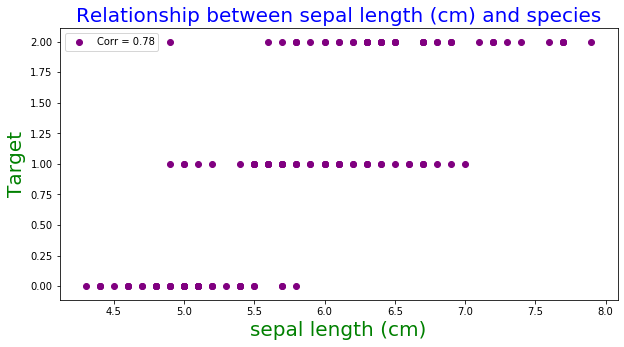

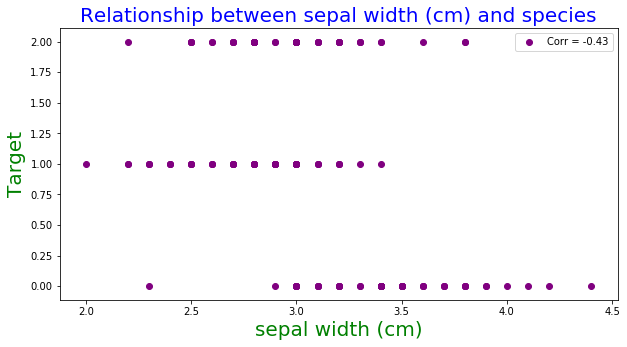

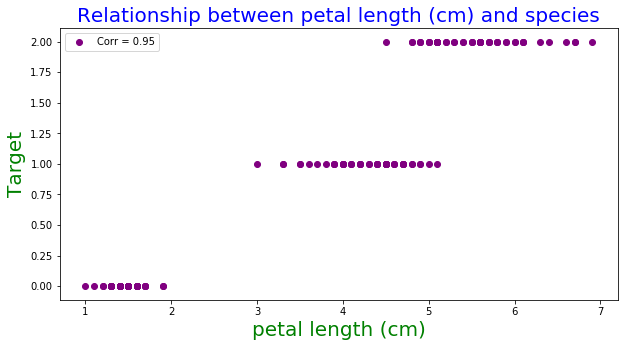

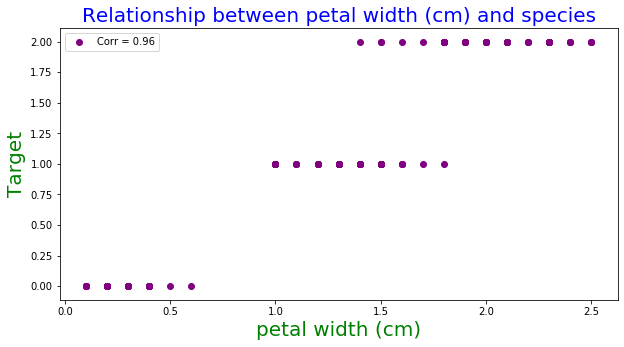

In [141]:
for column in df:
    corr = np.corrcoef(df[column],target)[0][1]
    plt.title(f"Relationship between {column} and species" , fontsize="20",color='blue')
    plt.scatter(df[column],target, label=f'Corr = {corr:.2f}',color="purple")
    plt.xlabel(column)
    plt.ylabel("Target")
    plt.legend()
    plt.show()



In [142]:
train_size = round(df.shape[0]*.80) 
test_size = df.shape[0] - train_size 
print(train_size, test_size, df.shape[0])

120 30 150


In [143]:
X_train, X_test, y_train, y_test = train_test_split(df, target,random_state=53, test_size=0.2)


In [144]:
 X_test.shape


(30, 4)

In [145]:
X_train.shape


(120, 4)

In [146]:
model_1 = LinearRegression()
model_2 = LinearRegression(normalize=True)


In [147]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [148]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)


In [149]:
print("Accuracy of Model-1: ", r2_score(y_test, y_pred_1)) 
print("Error of Model-1: ", mean_absolute_error(y_test, y_pred_1))

Accuracy of Model-1:  0.9074235535555805
Error of Model-1:  0.1793150948501778


In [150]:
scaled = StandardScaler()
scaled_df = scaled.fit_transform(df)


In [151]:
X_train , X_test , y_train,y_test = train_test_split(scaled_df,target,random_state=101)

In [152]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
y_pred = model.predict(X_test)
print("Accuracy of Model: ", r2_score(y_test, y_pred)) 
print("Error of Model: ", mean_absolute_error(y_test, y_pred) )

Accuracy of Model:  0.905204963520777
Error of Model:  0.18597825724784722


## Diamond dataset

In [169]:
data2 = sns.load_dataset("diamonds")

In [170]:
data2.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [171]:
data2["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [172]:
data2.loc[data2['cut'] == "Ideal", 'cut'] = 0
data2.loc[data2['cut'] == "Premium", 'cut'] = 1
data2.loc[data2['cut'] == "Very Good", 'cut'] = 2
data2.loc[data2['cut'] == "Good", 'cut'] = 3
data2.loc[data2['cut'] == "Fair", 'cut'] = 4

In [173]:
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [174]:
data2.loc[data2['color'] == "D", 'color'] = 0
data2.loc[data2['color'] == "E", 'color'] = 1
data2.loc[data2['color'] == "F", 'color'] = 2
data2.loc[data2['color'] == "G", 'color'] = 3
data2.loc[data2['color'] == "H", 'color'] = 4
data2.loc[data2['color'] == "I", 'color'] = 5
data2.loc[data2['color'] == "J", 'color'] =6

In [175]:

data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [176]:
data2["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [177]:
data2.loc[data2['clarity']=='SI1','clarity']=0
data2.loc[data2['clarity']=='VS2','clarity']=1
data2.loc[data2['clarity']=='SI2','clarity']=2
data2.loc[data2['clarity']=='VS1','clarity']=3
data2.loc[data2['clarity']=='VVS2','clarity']=4
data2.loc[data2['clarity']=='VVS1','clarity']=5
data2.loc[data2['clarity']=='IF','clarity']=6
data2.loc[data2['clarity']=="I1",'clarity']=7
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


In [178]:
target = data2["price"]
df1 = data2.drop(['price'], axis = 1)


In [179]:
target.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

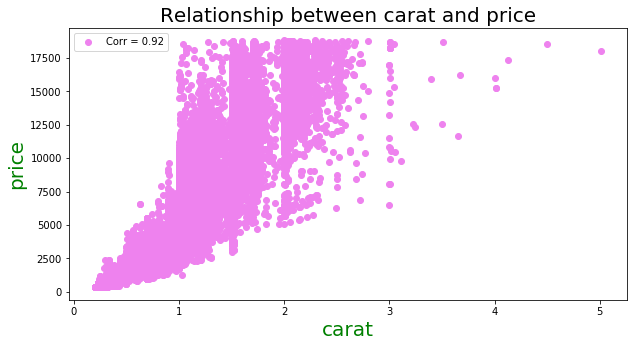

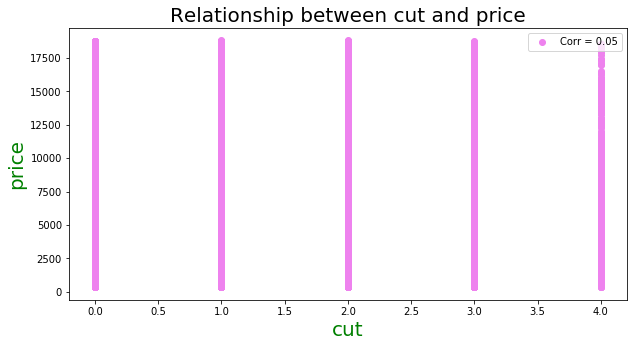

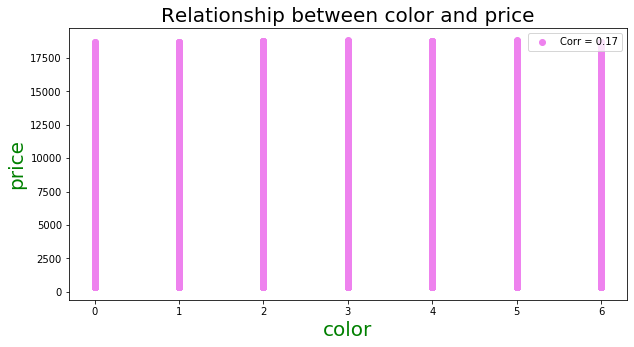

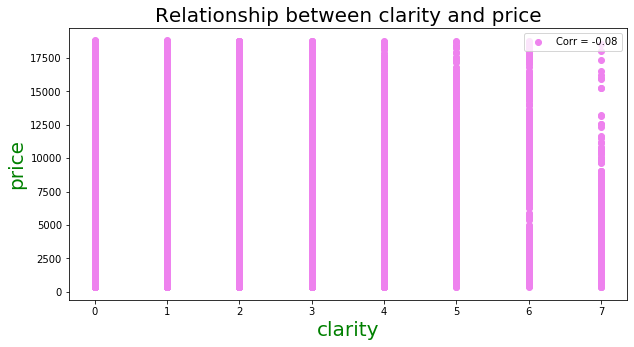

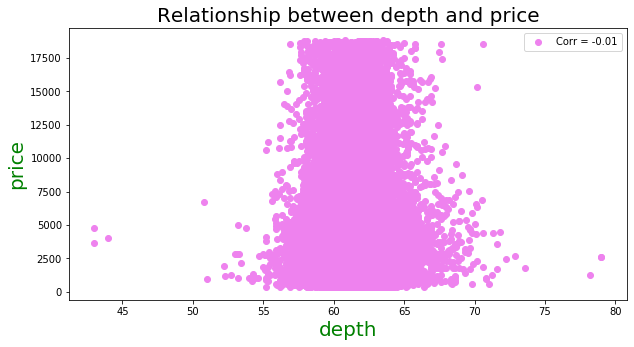

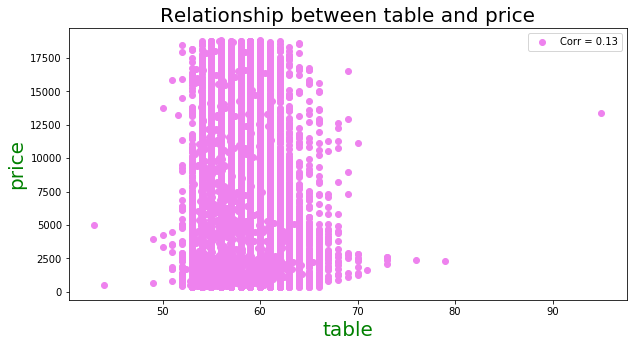

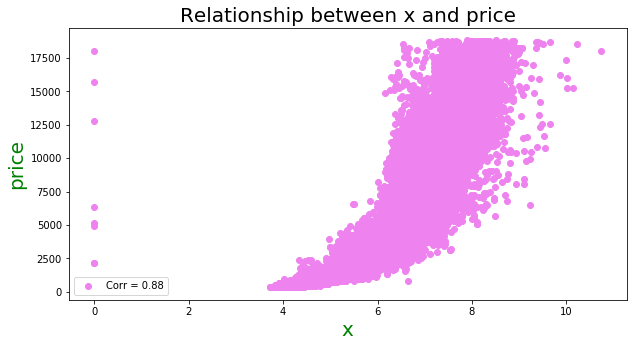

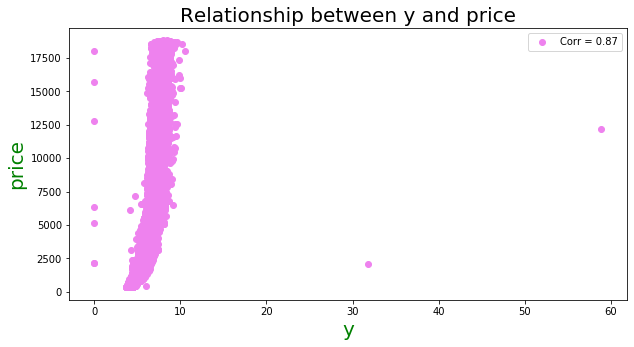

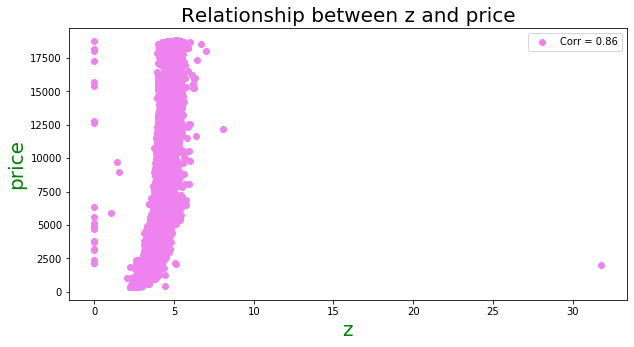

In [180]:
for columns in df1:
    corr = np.corrcoef(df1[columns],target)[0][1]
    plt.title(f"Relationship between {columns} and price" , fontsize="20")
    plt.scatter(df1[columns],target, label=f'Corr = {corr:.2f}',color="violet")
    plt.xlabel(columns)
    plt.ylabel("price")
    plt.legend()
    plt.show()

In [181]:
scaled = StandardScaler()


In [182]:
 scaled_df1 = scaled.fit_transform(df1)

In [186]:
X_train , X_test , y_train,y_test = train_test_split(scaled_df1,target,random_state=90)

In [187]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
y_pred = model.predict(X_test)
print("Accuracy of Model: ", r2_score(y_test, y_pred))
print("Error of Model: ", mean_absolute_error(y_test, y_pred) )


Accuracy of Model:  0.8802742992659586
Error of Model:  845.9401858190474
